<a href="https://colab.research.google.com/github/CL500Coupe/data_analytics_assi1/blob/main/assi1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
url <- "https://raw.githubusercontent.com/CL500Coupe/data_analytics_assi1/main/data/data.csv"
data <- read.csv(url)

In [46]:
head(data, 10)

,collision_date,day,year,mo,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS,co2,wind,so2,pressure
,<date>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2012-07-01,7,2012,7,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,0,538,14.58958,134.91354,3.9656250,999.4417
2,2012-07-02,1,2012,7,80.3,54.1,1011.6,10.0,3.8,15.0,18.1,88.0,66.9,0.00,0,564,13.74375,143.53125,1.2645833,1002.3106
3,2012-07-03,2,2012,7,79.8,56.7,1012.8,10.0,2.9,12.0,18.1,88.0,63.0,0.00,0,664,17.13759,124.85521,1.7647323,1002.4833
4,2012-07-04,3,2012,7,81.8,65.6,1009.1,9.2,3.6,11.1,18.1,91.0,68.0,0.06,0,432,12.17500,125.92083,1.9020833,998.5333
5,2012-07-05,4,2012,7,86.7,64.3,1007.4,9.4,3.8,15.0,18.1,93.9,70.0,99.99,0,591,11.28750,126.29375,1.2437500,998.0750
6,2012-07-06,5,2012,7,81.9,62.3,1011.7,10.0,3.1,9.9,18.1,91.0,66.9,0.00,0,638,15.72138,81.20729,1.1229165,1002.1083
7,2012-07-07,6,2012,7,84.9,65.9,1010.1,9.5,3.1,14.0,17.1,95.0,70.0,0.00,0,490,14.58333,131.10109,1.7781250,1000.0500
8,2012-07-08,7,2012,7,80.6,65.5,1010.1,8.5,3.1,8.0,15.9,90.0,70.0,0.59,0,464,9.90000,103.17083,0.8114583,1000.5417
9,2012-07-09,1,2012,7,78.5,56.8,1012.7,10.0,3.5,9.9,15.9,84.0,68.0,0.09,0,533,10.26042,67.32083,0.6715097,1003.6417


In [36]:
# Install the zoo package if you don't have it
if (!requireNamespace("zoo", quietly = TRUE)) {
  install.packages("zoo")
}

# Load the zoo package
library(zoo)

# Replace 999.9 values with NA
data[data == 999.9] <- NA

# Forward fill missing values
data <- data.frame(lapply(data, na.locf, na.rm = FALSE))

# Check the data
head(data)


,collision_date,day,year,mo,temp,dewp,slp,visib,wdsp,mxpsd,⋯,max,min,prcp,sndp,fog,NUM_COLLISIONS,co2,wind,so2,pressure
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2012-07-01,7,2012,7,83.6,63.0,1008.9,9.7,4.1,9.9,⋯,93.0,66.0,0.00,NA,0,538,14.58958,134.91354,3.965625,999.4417
2,2012-07-02,1,2012,7,80.3,54.1,1011.6,10.0,3.8,15.0,⋯,88.0,66.9,0.00,NA,0,564,13.74375,143.53125,1.264583,1002.3106
3,2012-07-03,2,2012,7,79.8,56.7,1012.8,10.0,2.9,12.0,⋯,88.0,63.0,0.00,NA,0,664,17.13759,124.85521,1.764732,1002.4833
4,2012-07-04,3,2012,7,81.8,65.6,1009.1,9.2,3.6,11.1,⋯,91.0,68.0,0.06,NA,0,432,12.17500,125.92083,1.902083,998.5333
5,2012-07-05,4,2012,7,86.7,64.3,1007.4,9.4,3.8,15.0,⋯,93.9,70.0,99.99,NA,0,591,11.28750,126.29375,1.243750,998.0750
6,2012-07-06,5,2012,7,81.9,62.3,1011.7,10.0,3.1,9.9,⋯,91.0,66.9,0.00,NA,0,638,15.72138,81.20729,1.122917,1002.1083


In [38]:
# Remove the 'sndp' column
data$sndp <- NULL

In [43]:
data_shape <- dim(data)
data_shape

[1] 2969   20

In [44]:
data <- data[!duplicated(data), ]


In [45]:
data$collision_date <- as.Date(data$collision_date)

In [53]:
# Function to detect outliers using the IQR method
detect_outliers <- function(column) {
  iqr <- IQR(column, na.rm = TRUE)
  q1 <- quantile(column, 0.25, na.rm = TRUE)
  q3 <- quantile(column, 0.75, na.rm = TRUE)
  
  lower_bound <- q1 - (1.5 * iqr)
  upper_bound <- q3 + (1.5 * iqr)
  
  outliers <- column[column < lower_bound | column > upper_bound]
  return(outliers)
}

# Loop through the columns of the dataframe
for (i in 1:ncol(data)) {
  # Check if the column is numeric and not the 'NUM_COLLISIONS' column
  if (is.numeric(data[, i]) && colnames(data)[i] != "NUM_COLLISIONS") {
    # Detect outliers in the current column
    outliers <- detect_outliers(data[, i])
    
    # Print the column name and the number of outliers detected
    cat(colnames(data)[i], ":", length(outliers), "outliers\n")
  }
}


day : 0 outliers
year : 0 outliers
mo : 0 outliers
temp : 0 outliers
dewp : 1 outliers
slp : 53 outliers
visib : 85 outliers
wdsp : 62 outliers
mxpsd : 84 outliers
gust : 156 outliers
max : 0 outliers
min : 0 outliers
prcp : 513 outliers
fog : 0 outliers
co2 : 76 outliers
wind : 14 outliers
so2 : 243 outliers
pressure : 307 outliers


In [54]:
# Define a function to convert month to season
month_to_season <- function(month) {
  if (month %in% c(3, 4, 5)) {
    return("spring")
  } else if (month %in% c(6, 7, 8)) {
    return("summer")
  } else if (month %in% c(9, 10, 11)) {
    return("autumn")
  } else {
    return("winter")
  }
}

# Apply the month_to_season function to the 'mo' column and create a new 'season' column
data$season <- sapply(data$mo, month_to_season)


In [57]:
# Define a function to convert season to a numeric value
season_to_numeric <- function(season) {
  if (season == "spring") {
    return(1)
  } else if (season == "summer") {
    return(2)
  } else if (season == "autumn") {
    return(3)
  } else {
    return(4)
  }
}

# Apply the season_to_numeric function to the 'season' column and replace the original 'season' column
data$season <- sapply(data$season, season_to_numeric)



In [59]:
# 7-day moving averages
data$visib_7day_ma <- zoo::rollmean(data$visib, k = 7, fill = NA, align = "right")
data$wdsp_7day_ma <- zoo::rollmean(data$wdsp, k = 7, fill = NA, align = "right")
data$co2_7day_ma <- zoo::rollmean(data$co2, k = 7, fill = NA, align = "right")
data$so2_7day_ma <- zoo::rollmean(data$so2, k = 7, fill = NA, align = "right")
data$pressure_7day_ma <- zoo::rollmean(data$pressure, k = 7, fill = NA, align = "right")
data$temp_7day_ma <- zoo::rollmean(data$temp, k = 7, fill = NA, align = "right")
data$wind_7day_ma <- zoo::rollmean(data$wind, k = 7, fill = NA, align = "right")

# 30-day moving averages
data$visib_30day_ma <- zoo::rollmean(data$visib, k = 30, fill = NA, align = "right")
data$wdsp_30day_ma <- zoo::rollmean(data$wdsp, k = 30, fill = NA, align = "right")
data$co2_30day_ma <- zoo::rollmean(data$co2, k = 30, fill = NA, align = "right")
data$so2_30day_ma <- zoo::rollmean(data$so2, k = 30, fill = NA, align = "right")
data$pressure_30day_ma <- zoo::rollmean(data$pressure, k = 30, fill = NA, align = "right")
data$temp_30day_ma <- zoo::rollmean(data$temp, k = 30, fill = NA, align = "right")
data$wind_30day_ma <- zoo::rollmean(data$wind, k = 30, fill = NA, align = "right")


In [62]:
data$temp_visib_interaction <- data$temp * data$visib
data$wdsp_visib_interaction <- data$wdsp * data$visib
data$prcp_temp_interaction <- data$prcp * data$temp
data$temp_season_interaction <- data$temp * data$season
data$wdsp_wind_interaction <- data$wdsp * data$wind

In [55]:
# Check the data types of each variable
str(data)

'data.frame':	2969 obs. of  21 variables:
 $ collision_date: Date, format: "2012-07-01" "2012-07-02" ...
 $ day           : int  7 1 2 3 4 5 6 7 1 2 ...
 $ year          : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ mo            : int  7 7 7 7 7 7 7 7 7 7 ...
 $ temp          : num  83.6 80.3 79.8 81.8 86.7 81.9 84.9 80.6 78.5 76.5 ...
 $ dewp          : num  63 54.1 56.7 65.6 64.3 62.3 65.9 65.5 56.8 56.3 ...
 $ slp           : num  1009 1012 1013 1009 1007 ...
 $ visib         : num  9.7 10 10 9.2 9.4 10 9.5 8.5 10 10 ...
 $ wdsp          : num  4.1 3.8 2.9 3.6 3.8 3.1 3.1 3.1 3.5 3.4 ...
 $ mxpsd         : num  9.9 15 12 11.1 15 9.9 14 8 9.9 9.9 ...
 $ gust          : num  18.1 18.1 18.1 18.1 18.1 18.1 17.1 15.9 15.9 15.9 ...
 $ max           : num  93 88 88 91 93.9 91 95 90 84 86 ...
 $ min           : num  66 66.9 63 68 70 66.9 70 70 68 61 ...
 $ prcp          : num  0e+00 0e+00 0e+00 6e-02 1e+02 ...
 $ fog           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NUM_COLLISI

In [5]:
# Get summary statistics
summary(data)

 collision_date          day             year            mo        
 Length:2969        Min.   :1.000   Min.   :2012   Min.   : 1.000  
 Class :character   1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000  
 Mode  :character   Median :4.000   Median :2016   Median : 7.000  
                    Mean   :4.001   Mean   :2016   Mean   : 6.536  
                    3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.: 9.000  
                    Max.   :7.000   Max.   :2020   Max.   :12.000  
                                                                   
      temp            dewp               slp            visib       
 Min.   : 5.80   Min.   :   -6.70   Min.   :  989   Min.   : 0.200  
 1st Qu.:41.00   1st Qu.:   32.40   1st Qu.: 1012   1st Qu.: 7.100  
 Median :52.10   Median :   45.40   Median : 1017   Median : 9.400  
 Mean   :52.07   Mean   :   47.86   Mean   : 1020   Mean   : 8.298  
 3rd Qu.:64.60   3rd Qu.:   59.10   3rd Qu.: 1022   3rd Qu.:10.000  
 Max.   :86.70   Max.   : 9999.90   Max.  

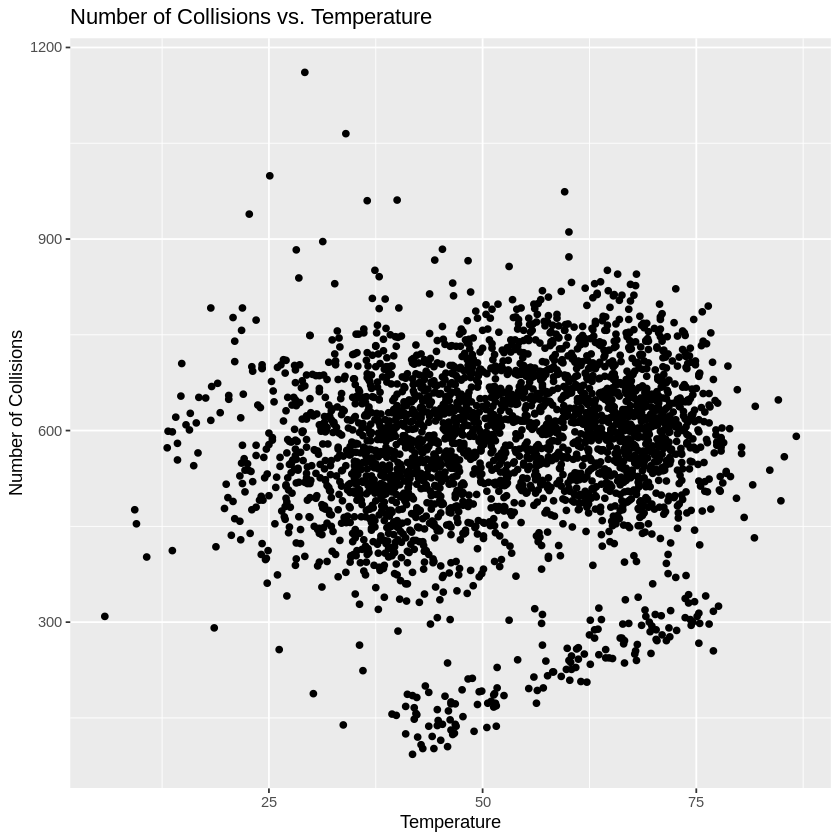

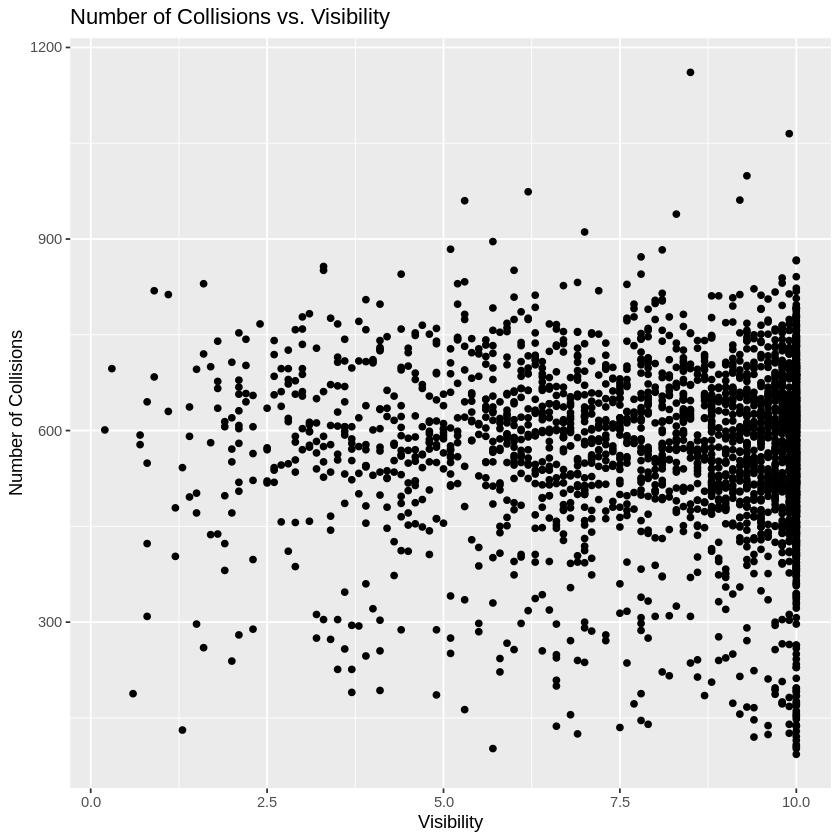

Warning message:
“Removed 322 rows containing missing values (`geom_point()`).”


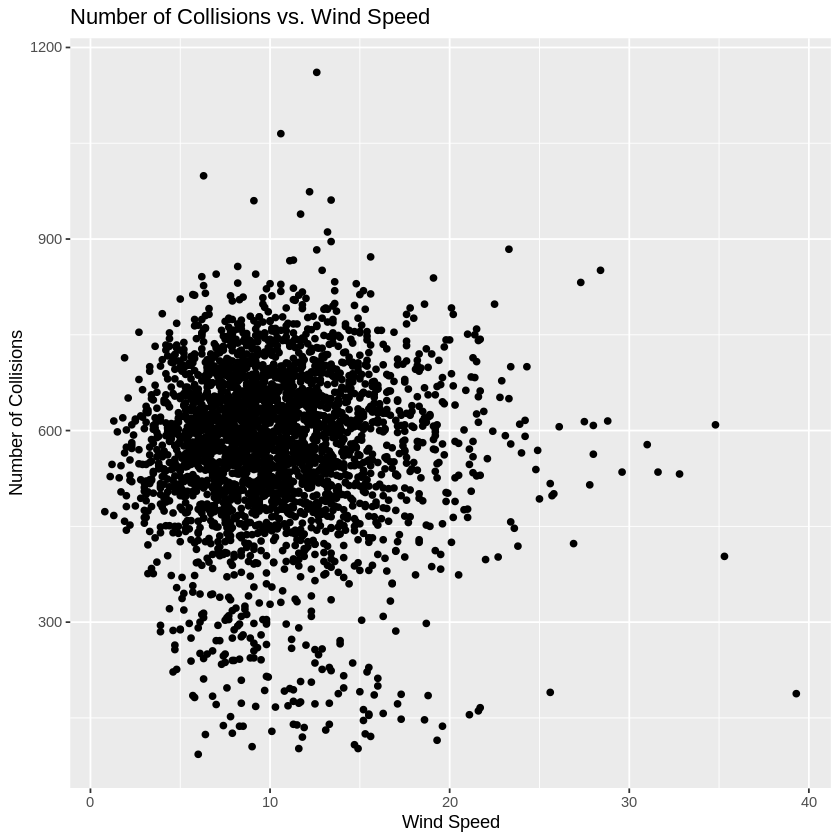

Warning message:
“Removed 322 rows containing missing values (`geom_point()`).”


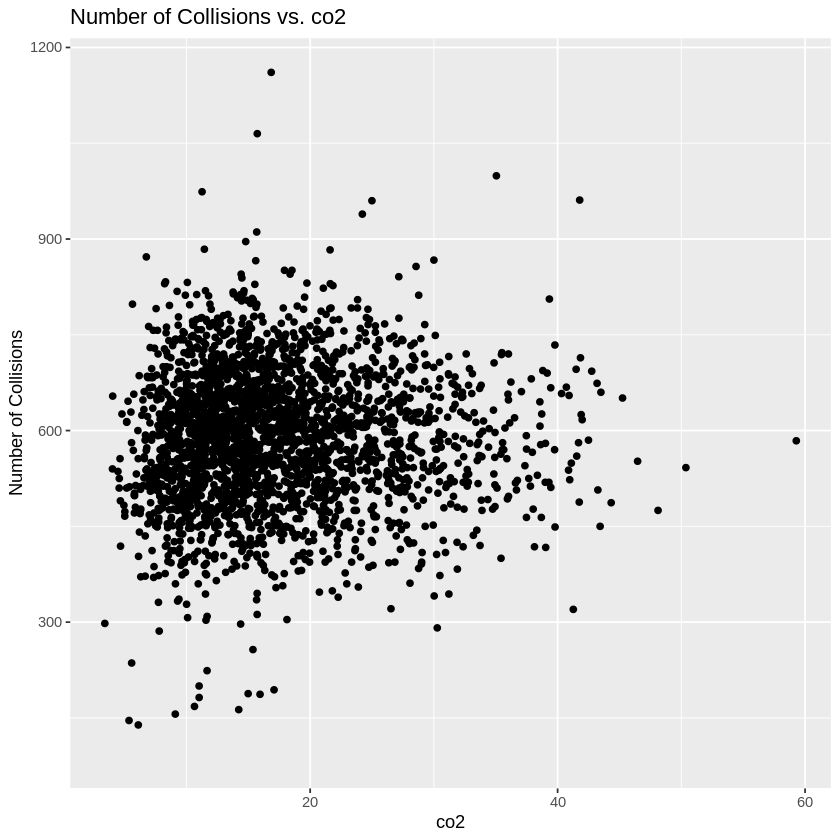

Warning message:
“Removed 322 rows containing missing values (`geom_point()`).”


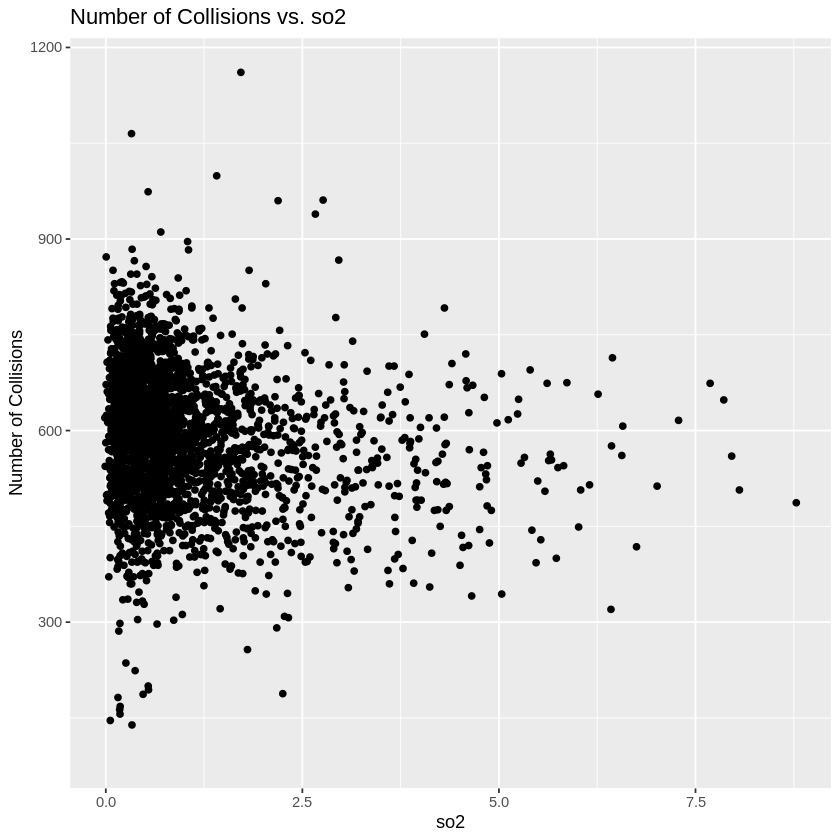

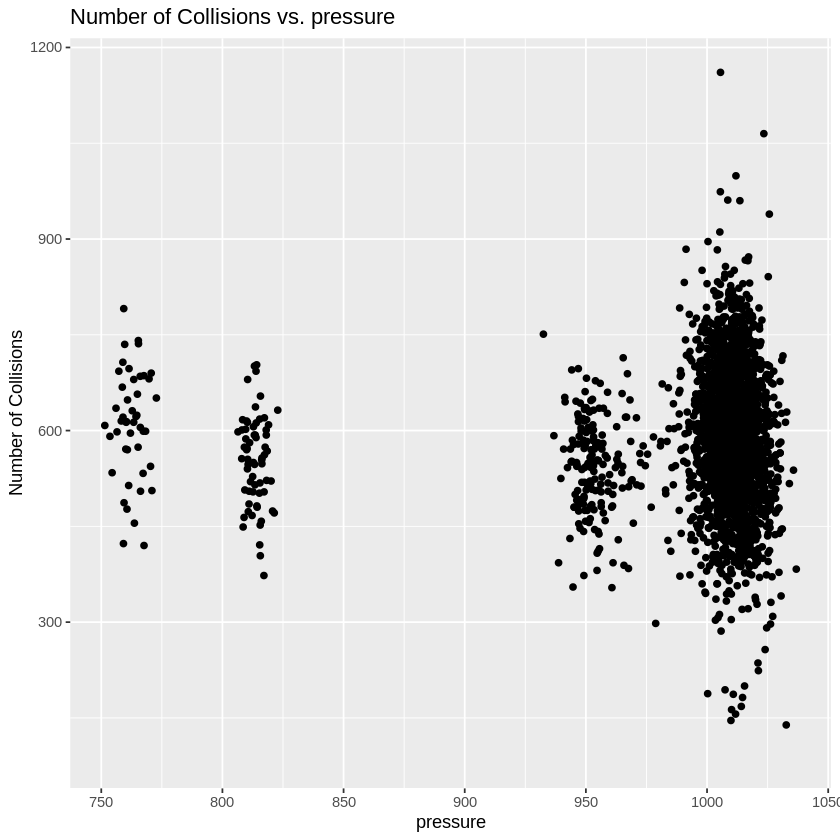

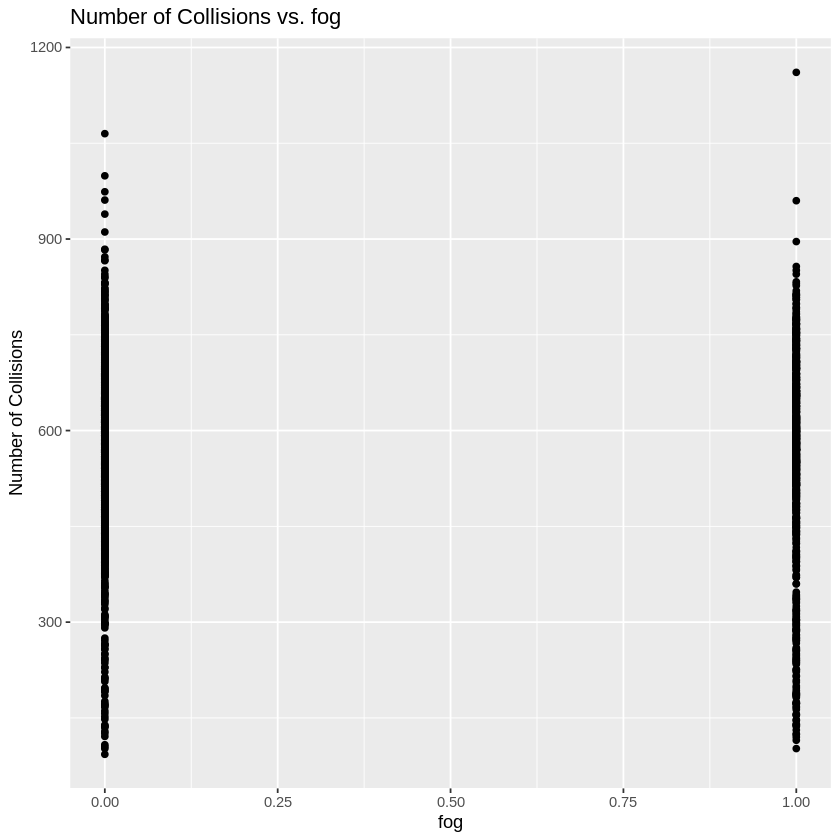

In [11]:

# Load the ggplot2 package for data visualization
library(ggplot2)

# Create a scatter plot of the number of collisions vs. temperature
ggplot(data, aes(x = temp, y = NUM_COLLISIONS)) +
  geom_point() +
  labs(title = "Number of Collisions vs. Temperature",
       x = "Temperature",
       y = "Number of Collisions")

# Create a scatter plot of the number of collisions vs. visibility
ggplot(data, aes(x = visib, y = NUM_COLLISIONS)) +
  geom_point() +
  labs(title = "Number of Collisions vs. Visibility",
       x = "Visibility",
       y = "Number of Collisions")

# Create a scatter plot of the number of collisions vs. wind speed
ggplot(data, aes(x = wdsp, y = NUM_COLLISIONS)) +
  geom_point() +
  labs(title = "Number of Collisions vs. Wind Speed",
       x = "Wind Speed",
       y = "Number of Collisions")


# Create a scatter plot of the number of collisions vs. co2
ggplot(data, aes(x = co2, y = NUM_COLLISIONS)) +
  geom_point() +
  labs(title = "Number of Collisions vs. co2",
       x = "co2",
       y = "Number of Collisions")

# Create a scatter plot of the number of collisions vs. so2
ggplot(data, aes(x = so2, y = NUM_COLLISIONS)) +
  geom_point() +
  labs(title = "Number of Collisions vs. so2",
       x = "so2",
       y = "Number of Collisions")


# Create a scatter plot of the number of collisions vs. pressure
ggplot(data, aes(x = pressure, y = NUM_COLLISIONS)) +
  geom_point() +
  labs(title = "Number of Collisions vs. pressure",
       x = "pressure",
       y = "Number of Collisions")


# Create a scatter plot of the number of collisions vs. fog
ggplot(data, aes(x = fog, y = NUM_COLLISIONS)) +
  geom_point() +
  labs(title = "Number of Collisions vs. fog",
       x = "fog",
       y = "Number of Collisions")

In [12]:
# Calculate the correlation between the number of collisions and temperature
cor(data$NUM_COLLISIONS, data$temp, use = "complete.obs")

# Calculate the correlation between the number of collisions and visibility
cor(data$NUM_COLLISIONS, data$visib, use = "complete.obs")

# Calculate the correlation between the number of collisions and wind speed
cor(data$NUM_COLLISIONS, data$wdsp, use = "complete.obs")

[1] 0.1045733

[1] -0.02859336

[1] 0.0001773414

In [63]:
# Loop through the columns from the 5th to the last
for (i in 5:ncol(data)) {
  # Calculate the correlation between the number of collisions and the current variable
  correlation <- cor(data$NUM_COLLISIONS, data[, i], use = "complete.obs")
  
  # Print the column name and its correlation with the number of collisions
  cat(colnames(data)[i], ":", correlation, "\n")
}


temp : 0.1045733 
dewp : 0.01682437 
slp : -0.006779076 
visib : -0.02859336 
wdsp : 0.0001773414 
mxpsd : -0.0209237 
gust : -0.01527128 
max : 0.1070037 
min : 0.1004296 
prcp : -0.02913324 
fog : -0.06623098 
NUM_COLLISIONS : 1 
co2 : 0.1523595 
wind : 0.134706 
so2 : -0.03690777 
pressure : -0.004275096 
season : 0.04134472 
visib_7day_ma : 0.02572697 
wdsp_7day_ma : -0.02456087 
co2_7day_ma : 0.09332765 
so2_7day_ma : -0.04920564 
pressure_7day_ma : 0.006271832 
temp_7day_ma : 0.09503372 
wind_7day_ma : 0.154593 
visib_30day_ma : 0.003909875 
wdsp_30day_ma : -0.05286981 
co2_30day_ma : 0.07661298 
so2_30day_ma : -0.07077108 
pressure_30day_ma : 0.01246448 
temp_30day_ma : 0.1269186 
wind_30day_ma : 0.1559 
temp_visib_interaction : 0.05845669 
wdsp_visib_interaction : -0.01060896 
prcp_temp_interaction : -0.03233877 
temp_season_interaction : 0.1216585 
wdsp_wind_interaction : 0.07314685 


In [17]:
#install.packages("ggplot2")
library(ggplot2)

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


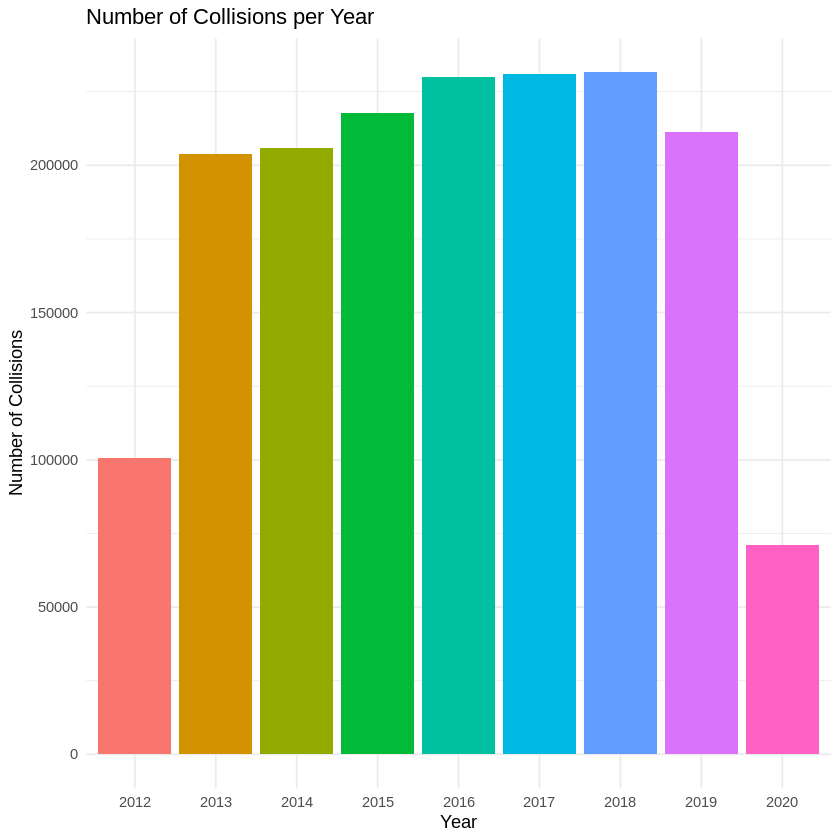

In [19]:
# Create the bar plot with different colors for each year and all years on the x-axis
ggplot(yearly_collisions, aes(x = factor(Year), y = Num_Collisions, fill = factor(Year))) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  scale_x_discrete(breaks = yearly_collisions$Year) +
  labs(title = "Number of Collisions per Year",
       x = "Year",
       y = "Number of Collisions") +
  guides(fill = FALSE)


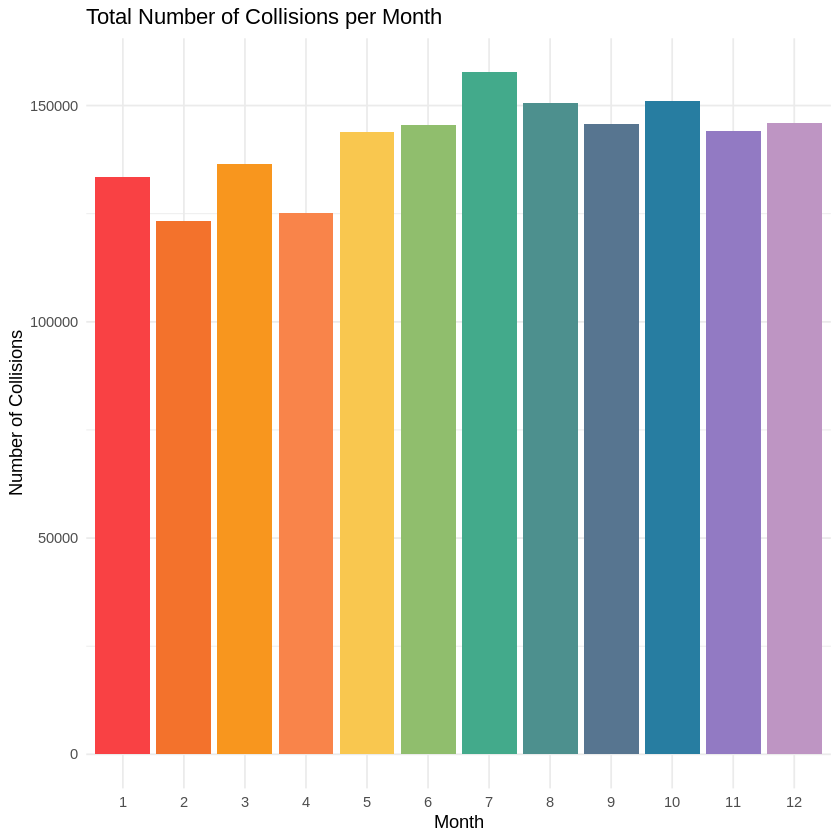

In [21]:
# Define a color palette for each month
month_colors <- c("#F94144", "#F3722C", "#F8961E", "#F9844A", "#F9C74F", "#90BE6D", "#43AA8B", "#4D908E", "#577590", "#277DA1", "#927AC3", "#BE95C3")

# Create a bar plot of total number of collisions for each month with custom colors
ggplot(monthly_collisions, aes(x = factor(mo), y = Num_Collisions, fill = factor(mo))) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = month_colors) +
  theme_minimal() +
  labs(title = "Total Number of Collisions per Month",
       x = "Month",
       y = "Number of Collisions") +
  theme(legend.position = "none")
